# Titanic Survival Predictions
I have found a cleaner way to work through the titanic data set!

### Steps Covered


1. Importing  a DataFrame
2. Visualize the Data
3. Cleanup and Transform the Data
4. Encode the Data


## Importing a DataFrame and Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('/Users/florianhansmann/Downloads/your-first-kaggle-submission-master/data/train.csv')
data_test = pd.read_csv('/Users/florianhansmann/Downloads/your-first-kaggle-submission-master/data/test.csv')


data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.550,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.000,NaN,S


## Visualizing Data

Visualizing data is crucial for recognizing underlying patterns to exploit in the model. 

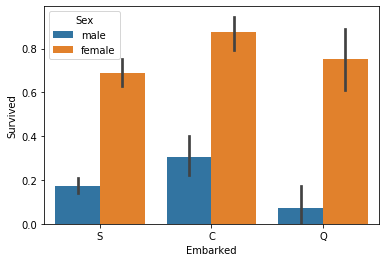

In [2]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

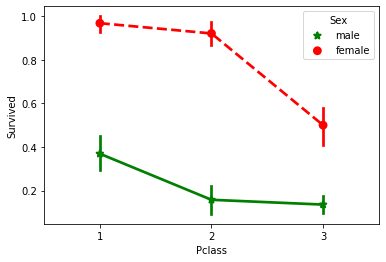

In [5]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "green", "female": "red"},
              markers=["*", "o"], linestyles=["-", "--"]);

## Transforming Features

1. Aside from 'Sex', the 'Age' feature is second in importance. To avoid overfitting, I'm grouping people into logical human age groups. 
2. Each Cabin starts with a letter. I bet this letter is much more important than the number that follows, let's slice it off. 
3. Fare is another continuous value that should be simplified. I ran `data_train.Fare.describe()` to get the distribution of the feature, then placed them into quartile bins accordingly. 
4. Extract information from the 'Name' feature. Rather than use the full name, I extracted the last name and name prefix (Mr. Mrs. Etc.), then appended them as their own features. 
5. Lastly, drop useless features. (Ticket and Name)

In [4]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


## Some Final Encoding

The last part of the preprocessing phase is to normalize labels. The LabelEncoder in Scikit-learn will convert each unique string value into a number, making out data more flexible for various algorithms. 

The result is a table of numbers that looks scary to humans, but beautiful to machines. 

In [ ]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()